In [1]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Read in data 

data = "Resources/Debernardi et al 2020 data.csv"
markers_df = pd.read_csv(data)
markers_df.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [3]:
# Check data types

markers_df.dtypes

sample_id                   object
patient_cohort              object
sample_origin               object
age                          int64
sex                         object
diagnosis                    int64
stage                       object
benign_sample_diagnosis     object
plasma_CA19_9              float64
creatinine                 float64
LYVE1                      float64
REG1B                      float64
TFF1                       float64
REG1A                      float64
dtype: object

In [5]:
df_columns = markers_df.columns.tolist()

In [6]:
# Print number of blanks in each column

for item in df_columns:
    print(f"There are {markers_df[item].isna().sum()} blank rows in column {item}.")

There are 0 blank rows in column sample_id.
There are 0 blank rows in column patient_cohort.
There are 0 blank rows in column sample_origin.
There are 0 blank rows in column age.
There are 0 blank rows in column sex.
There are 0 blank rows in column diagnosis.
There are 391 blank rows in column stage.
There are 382 blank rows in column benign_sample_diagnosis.
There are 240 blank rows in column plasma_CA19_9.
There are 0 blank rows in column creatinine.
There are 0 blank rows in column LYVE1.
There are 0 blank rows in column REG1B.
There are 0 blank rows in column TFF1.
There are 284 blank rows in column REG1A.


In [7]:
# Read in data for benign patient averages

benign_avg = "Resources/benign_avg.csv"
benign_avg_df = pd.read_csv(benign_avg)
benign_avg_df

,benign_sample_diagnosis,plasma_avg,creat_avg,lyve1_avg,reg1b_avg,tff1_avg,reg1a_avg
0,Abdominal Pain,24.67,0.66,2.37,25.52,175.44,NaN
1,Biliary Stricture (Secondary to Stent),31.62,0.38,3.71,215.58,656.79,1305.15
2,Cholecystitis,NaN,0.34,0.14,20.01,41.58,NaN
3,Cholecystitis,10.00,0.72,0.74,21.41,68.95,NaN
4,Cholecystitis (Chronic),17.00,0.70,0.97,76.26,617.70,NaN
5,Cholecystitis (Chronic) Cholelithiasis,5.00,0.63,2.26,45.52,391.26,NaN
6,Cholecystitis (Chronic) Cholesterolsis,29.00,0.93,1.56,32.09,191.50,NaN
7,Choledochal Cyst,15.00,0.17,0.21,18.35,0.01,NaN
8,Choledocholiathiasis,14.83,0.72,2.59,160.94,709.87,248.83
9,Choledocholiathiasis,NaN,1.52,1.23,42.51,674.29,NaN


In [8]:
# Read in data for control patient averages

control_avg = "Resources/control_avg.csv"
control_avg_df = pd.read_csv(control_avg)
control_avg_df

,control_group,plasma_avg,creat_avg,lyve1_avg,reg1b_avg,tff1_avg,reg1a_avg
0,NaN,8.75,0.8,1.21,41.33,169.02,227.87


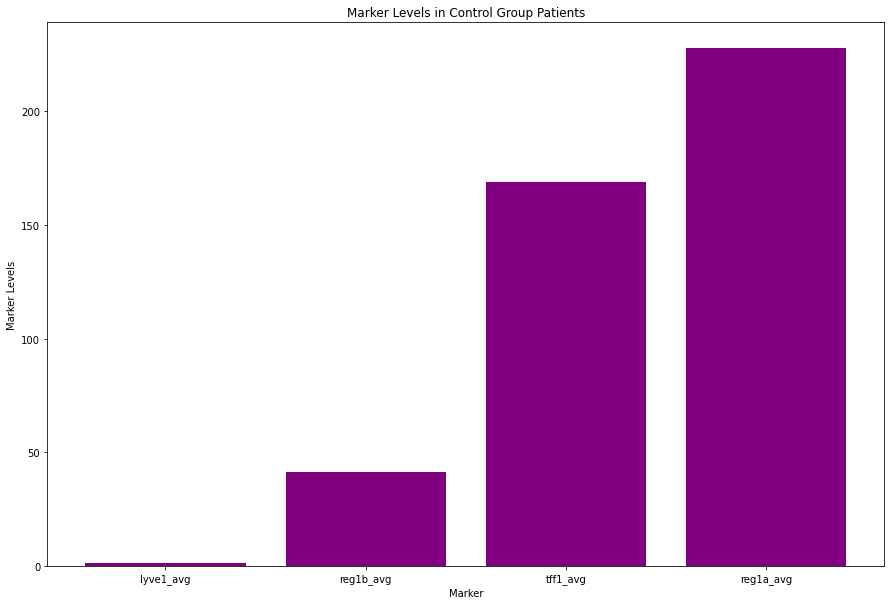

In [9]:
# Make and save bar plot

control_y = control_avg_df.drop("control_group", axis=1)
X_labels = control_y.columns.tolist()
X_labels.remove("plasma_avg")
X_labels.remove("creat_avg")

values = []
for item in X_labels:
    x = control_y[item].tolist()[0]
    values.append(x)

X_axis = np.arange(len(X_labels))

fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(10)

plt.bar(X_labels, values, color = "purple")

plt.xticks(X_axis, X_labels)
plt.xlabel("Marker")
plt.ylabel("Marker Levels")
plt.title("Marker Levels in Control Group Patients")

plt.savefig("Images/control_group_markers.png", bbox_inches = "tight")

plt.show()

In [10]:
# Read in data for stage averages

stage_avg = "Resources/stage_avg.csv"
stage_avg_df = pd.read_csv(stage_avg)
stage_avg_df

,stage,plasma_avg,creat_avg,lyve1_avg,reg1b_avg,tff1_avg,reg1a_avg
0,I,NaN,0.57,12.02,431.42,874.10,NaN
1,IA,10.67,0.88,2.03,87.43,330.60,182.73
2,IB,1486.87,0.62,3.07,128.82,564.48,1811.72
3,II,NaN,1.02,9.98,503.06,1467.86,1929.56
4,IIA,592.91,0.64,3.11,206.68,1607.51,636.39
5,IIB,1345.56,0.78,5.29,199.20,1068.57,764.18
6,III,1662.51,1.07,6.30,221.19,1118.93,1148.34
7,IV,3430.30,1.08,7.35,316.46,1632.15,4132.15


In [11]:
# Making y-values for stages

I_values = []
for item in X_labels:
    y = stage_avg_df.loc[stage_avg_df["stage"] == "I"][item].tolist()
    I_values.append(y[0])
    
IA_values = []
for item in X_labels:
    y = stage_avg_df.loc[stage_avg_df["stage"] == "IA"][item].tolist()
    IA_values.append(y[0])
    
IB_values = []
for item in X_labels:
    y = stage_avg_df.loc[stage_avg_df["stage"] == "IB"][item].tolist()
    IB_values.append(y[0])
    
II_values = []
for item in X_labels:
    y = stage_avg_df.loc[stage_avg_df["stage"] == "II"][item].tolist()
    II_values.append(y[0])
    
IIA_values = []
for item in X_labels:
    y = stage_avg_df.loc[stage_avg_df["stage"] == "IIA"][item].tolist()
    IIA_values.append(y[0])

IIB_values = []
for item in X_labels:
    y = stage_avg_df.loc[stage_avg_df["stage"] == "IIB"][item].tolist()
    IIB_values.append(y[0])
    
III_values = []
for item in X_labels:
    y = stage_avg_df.loc[stage_avg_df["stage"] == "III"][item].tolist()
    III_values.append(y[0])
    
IV_values = []
for item in X_labels:
    y = stage_avg_df.loc[stage_avg_df["stage"] == "IV"][item].tolist()
    IV_values.append(y[0])

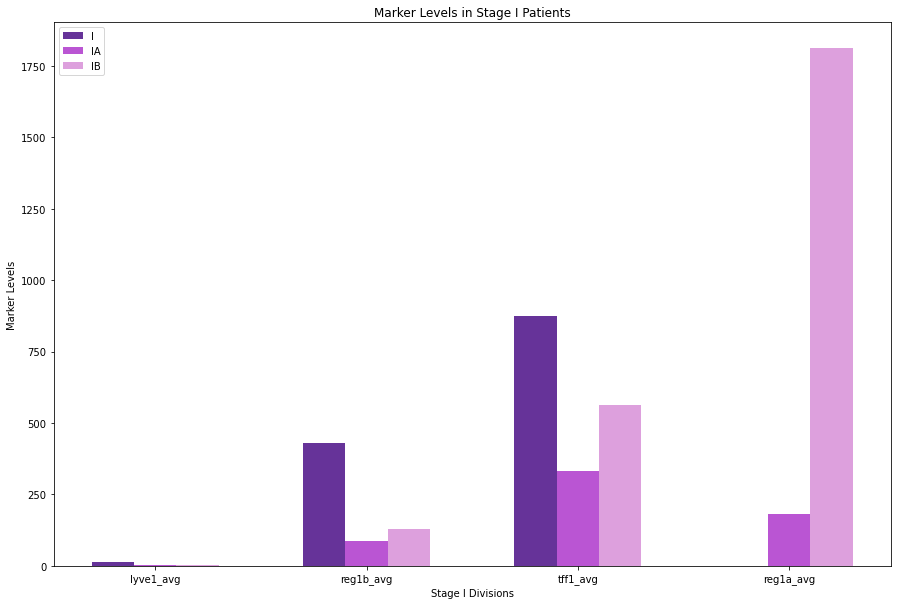

In [12]:
# Make and save bar plot of stage I averages

X_axis = np.arange(len(X_labels))

fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(10)

plt.bar(X_axis - 0.2, I_values, 0.2, label = "I", color = "rebeccapurple")
plt.bar(X_axis, IA_values, 0.2, label = "IA", color = "mediumorchid")
plt.bar(X_axis + 0.2, IB_values, 0.2, label = "IB", color = "plum")

plt.xticks(X_axis, X_labels)
plt.xlabel("Stage I Divisions")
plt.ylabel("Marker Levels")
plt.title("Marker Levels in Stage I Patients")
plt.legend()

plt.savefig("Images/stageI_markers.png", bbox_inches = "tight")

plt.show()

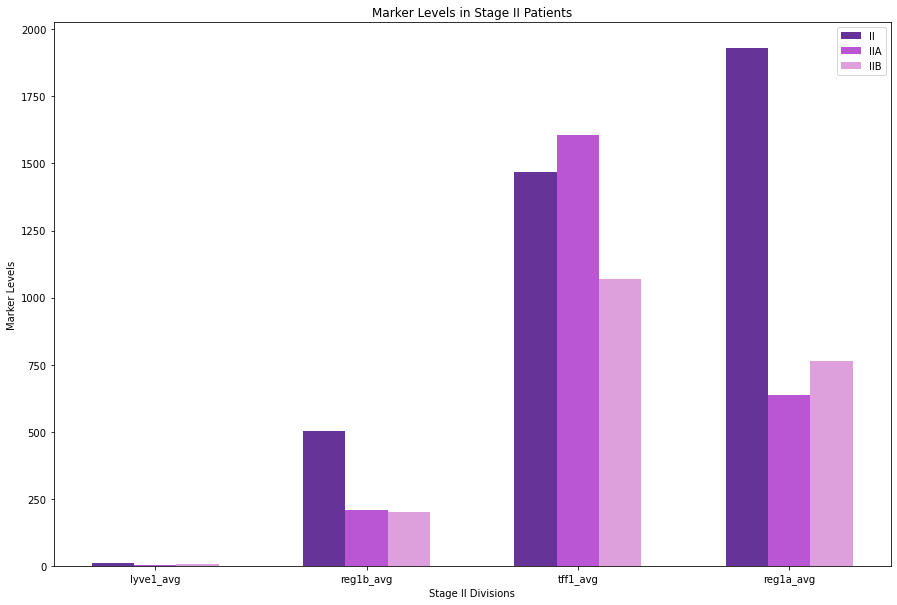

In [13]:
# Make and save bar plot of stage II averages

X_axis = np.arange(len(X_labels))

fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(10)

plt.bar(X_axis - 0.2, II_values, 0.2, label = "II", color = "rebeccapurple")
plt.bar(X_axis, IIA_values, 0.2, label = "IIA", color = "mediumorchid")
plt.bar(X_axis + 0.2, IIB_values, 0.2, label = "IIB", color = "plum")

plt.xticks(X_axis, X_labels)
plt.xlabel("Stage II Divisions")
plt.ylabel("Marker Levels")
plt.title("Marker Levels in Stage II Patients")
plt.legend()

plt.savefig("Images/stageII_markers.png", bbox_inches = "tight")

plt.show()

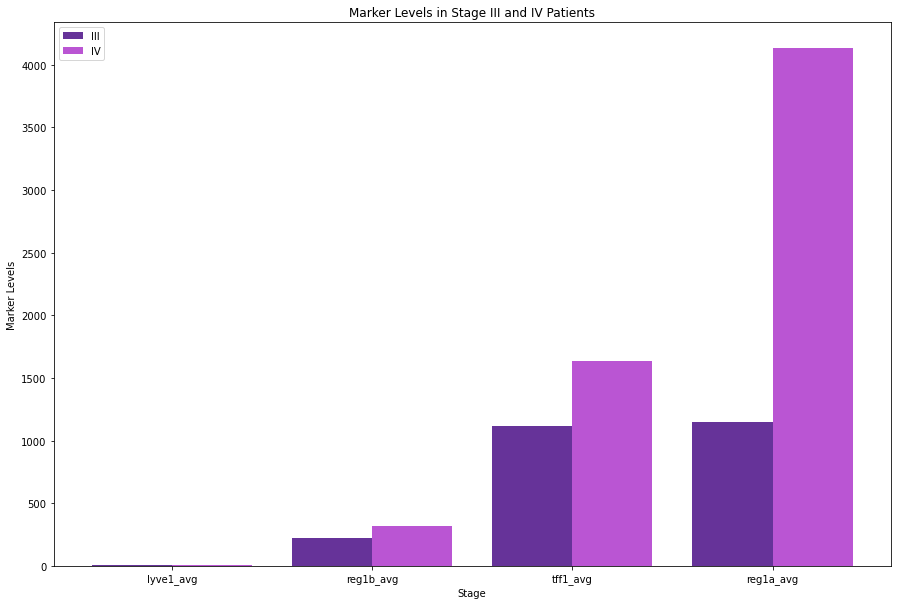

In [14]:
# Make and save bar plot of stage III and IV averages

X_axis = np.arange(len(X_labels))

fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(10)

plt.bar(X_axis - 0.2, III_values, 0.4, label = "III", color = "rebeccapurple")
plt.bar(X_axis + 0.2, IV_values, 0.4, label = "IV", color = "mediumorchid")

plt.xticks(X_axis, X_labels)
plt.xlabel("Stage")
plt.ylabel("Marker Levels")
plt.title("Marker Levels in Stage III and IV Patients")
plt.legend()

plt.savefig("Images/stageIII_IV_markers.png", bbox_inches = "tight")

plt.show()

In [15]:
# Read in gender averages data

gender_stats = "Resources/gender_statistics.csv"
gender_stats_df = pd.read_csv(gender_stats)
gender_stats_df

,sex,sex_count,plasma_avg,creat_avg,lyve1_avg,reg1b_avg,tff1_avg,reg1a_avg
0,M,291,836.27,0.97,3.68,143.10,715.17,881.46
1,F,299,479.88,0.74,2.46,81.29,483.70,532.00


In [16]:
# Making y values for sex
male_values = []
for item in X_labels:
    y = gender_stats_df.loc[gender_stats_df["sex"] == "M"][item].tolist()
    male_values.append(y[0])
    
female_values = []
for item in X_labels:
    y = gender_stats_df.loc[gender_stats_df["sex"] == "F"][item].tolist()
    female_values.append(y[0])

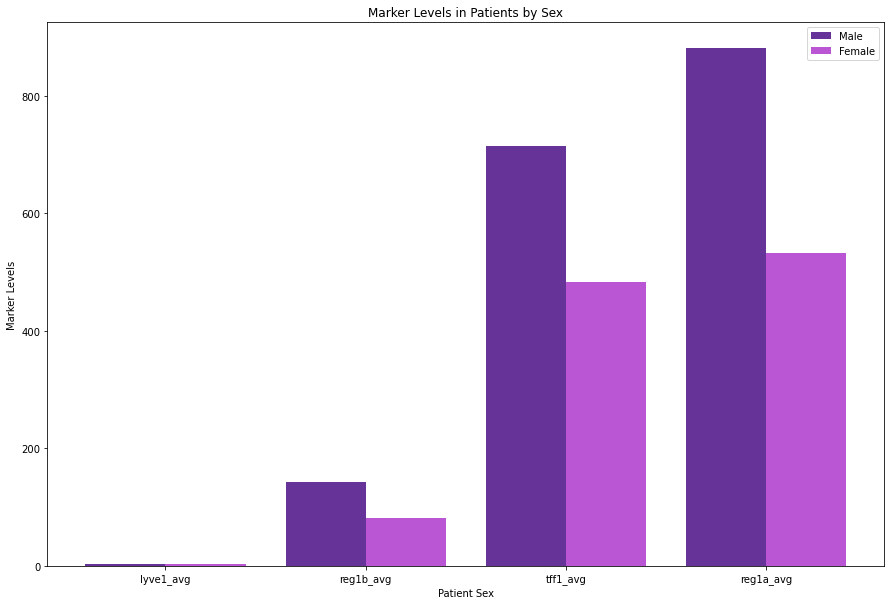

In [17]:
# Make and save barplot of gender data

X_axis = np.arange(len(X_labels))

fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(10)

plt.bar(X_axis - 0.2, male_values, 0.4, label = "Male", color = "rebeccapurple")
plt.bar(X_axis + 0.2, female_values, 0.4, label = "Female", color = "mediumorchid")

plt.xticks(X_axis, X_labels)
plt.xlabel("Patient Sex")
plt.ylabel("Marker Levels")
plt.title("Marker Levels in Patients by Sex")
plt.legend()

plt.savefig("Images/gender_markers.png", bbox_inches = "tight")

plt.show()

In [18]:
# Read in combined diagnosis/gender averages data

diagnosis_gender_stats = "Resources/diagnosis_gender_statistics.csv"
diagnosis_gender_stats_df = pd.read_csv(diagnosis_gender_stats)
diagnosis_gender_stats_df

,diagnosis,sex,diagnosis_count,plasma_avg,creat_avg,lyve1_avg,reg1b_avg,tff1_avg,reg1a_avg
0,1,F,115,10.21,0.68,1.01,31.02,148.20,182.04
1,1,M,68,6.26,0.99,1.55,58.75,204.24,274.88
2,2,F,101,17.28,0.73,1.56,48.84,298.61,550.30
3,2,M,107,111.52,0.96,2.58,78.65,589.51,545.89
4,3,F,83,1317.52,0.84,5.57,190.41,1173.78,767.64
5,3,M,116,1594.21,0.97,5.95,251.99,1130.60,1392.89


In [19]:
# Make additional column with concatenated diagnosis and gender

diagnosis_sex = []

for i in range(0, len(diagnosis_gender_stats_df)):
    diagnosis_sex.append(str(diagnosis_gender_stats_df["diagnosis"].tolist()[i]) + "_" + diagnosis_gender_stats_df["sex"].tolist()[i])

In [20]:
diagnosis_gender_stats_df["diagnosis_sex"] = diagnosis_sex

diagnosis_gender_stats_df

,diagnosis,sex,diagnosis_count,plasma_avg,creat_avg,lyve1_avg,reg1b_avg,tff1_avg,reg1a_avg,diagnosis_sex
0,1,F,115,10.21,0.68,1.01,31.02,148.20,182.04,1_F
1,1,M,68,6.26,0.99,1.55,58.75,204.24,274.88,1_M
2,2,F,101,17.28,0.73,1.56,48.84,298.61,550.30,2_F
3,2,M,107,111.52,0.96,2.58,78.65,589.51,545.89,2_M
4,3,F,83,1317.52,0.84,5.57,190.41,1173.78,767.64,3_F
5,3,M,116,1594.21,0.97,5.95,251.99,1130.60,1392.89,3_M


In [21]:
# Making y values for diagnosis_sex

male1_values = []
for item in X_labels:
    y = diagnosis_gender_stats_df.loc[diagnosis_gender_stats_df["diagnosis_sex"] == "1_M"][item].tolist()
    male1_values.append(y[0])

female1_values = []
for item in X_labels:
    y = diagnosis_gender_stats_df.loc[diagnosis_gender_stats_df["diagnosis_sex"] == "1_F"][item].tolist()
    female1_values.append(y[0])
    
male2_values = []
for item in X_labels:
    y = diagnosis_gender_stats_df.loc[diagnosis_gender_stats_df["diagnosis_sex"] == "2_M"][item].tolist()
    male2_values.append(y[0])
    
female2_values = []
for item in X_labels:
    y = diagnosis_gender_stats_df.loc[diagnosis_gender_stats_df["diagnosis_sex"] == "2_F"][item].tolist()
    female2_values.append(y[0])
    
male3_values = []
for item in X_labels:
    y = diagnosis_gender_stats_df.loc[diagnosis_gender_stats_df["diagnosis_sex"] == "3_M"][item].tolist()
    male3_values.append(y[0])
    
female3_values = []
for item in X_labels:
    y = diagnosis_gender_stats_df.loc[diagnosis_gender_stats_df["diagnosis_sex"] == "3_F"][item].tolist()
    female3_values.append(y[0])

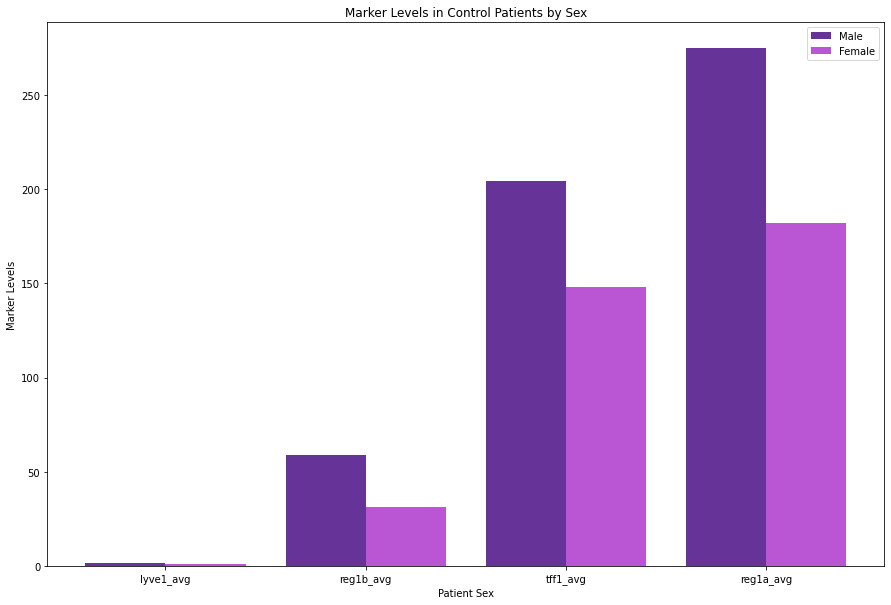

In [22]:
# Make and save barplot for control patients by gender

X_axis = np.arange(len(X_labels))

fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(10)

plt.bar(X_axis - 0.2, male1_values, 0.4, label = "Male", color = "rebeccapurple")
plt.bar(X_axis + 0.2, female1_values, 0.4, label = "Female", color = "mediumorchid")

plt.xticks(X_axis, X_labels)
plt.xlabel("Patient Sex")
plt.ylabel("Marker Levels")
plt.title("Marker Levels in Control Patients by Sex")
plt.legend()

plt.savefig("Images/control_gender_markers.png", bbox_inches = "tight")

plt.show()

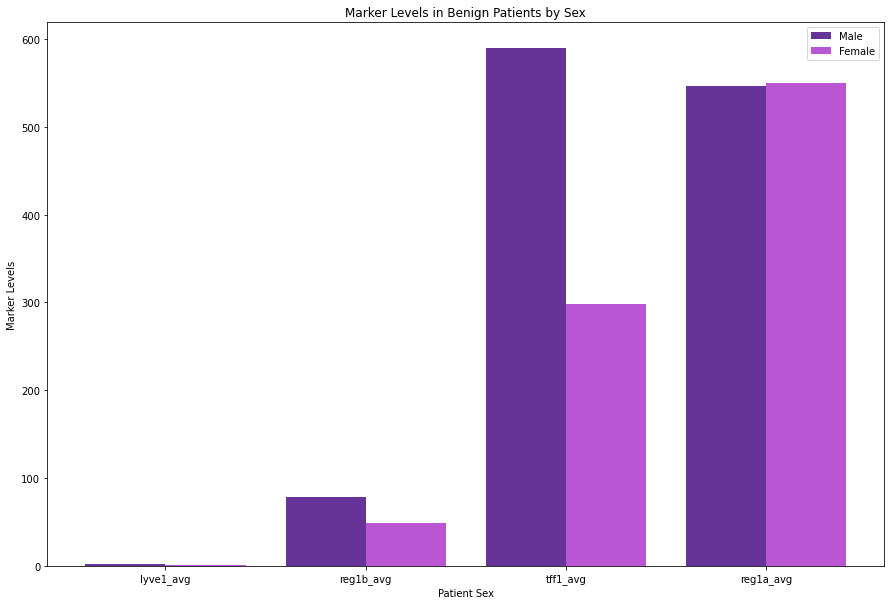

In [23]:
# Make and save barplot for benign patients by gender

X_axis = np.arange(len(X_labels))

fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(10)

plt.bar(X_axis - 0.2, male2_values, 0.4, label = "Male", color = "rebeccapurple")
plt.bar(X_axis + 0.2, female2_values, 0.4, label = "Female", color = "mediumorchid")

plt.xticks(X_axis, X_labels)
plt.xlabel("Patient Sex")
plt.ylabel("Marker Levels")
plt.title("Marker Levels in Benign Patients by Sex")
plt.legend()

plt.savefig("Images/benign_gender_markers.png", bbox_inches = "tight")

plt.show()

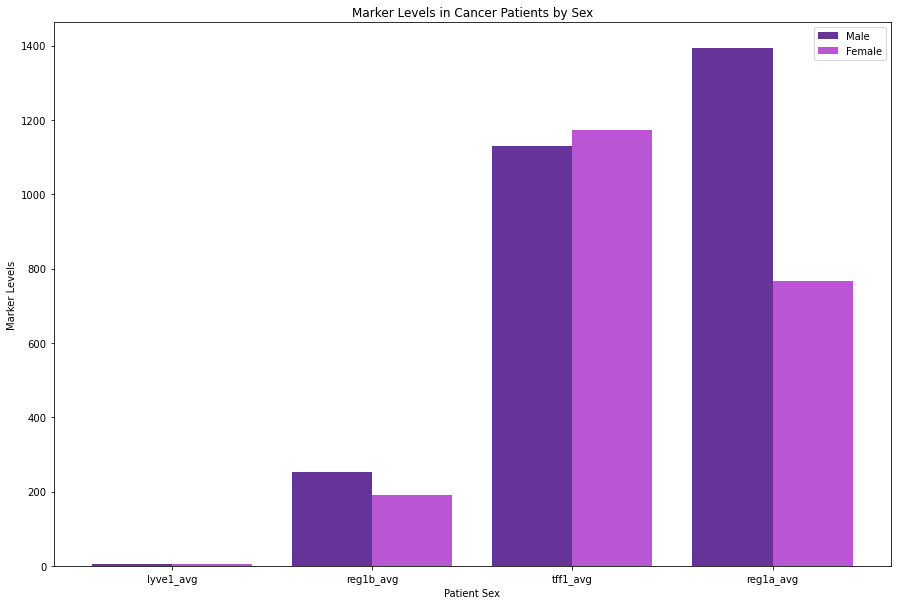

In [24]:
# Make and save barplot for cancer patients by gender

X_axis = np.arange(len(X_labels))

fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(10)

plt.bar(X_axis - 0.2, male3_values, 0.4, label = "Male", color = "rebeccapurple")
plt.bar(X_axis + 0.2, female3_values, 0.4, label = "Female", color = "mediumorchid")

plt.xticks(X_axis, X_labels)
plt.xlabel("Patient Sex")
plt.ylabel("Marker Levels")
plt.title("Marker Levels in Cancer Patients by Sex")
plt.legend()

plt.savefig("Images/cancer_gender_markers.png", bbox_inches = "tight")

plt.show()